# Data analysis

In this notebook, we will go over some of the fundamentals of using Python for data analysis, focusing on what we need for iGEM competition. We assume you are familiar with the content [in our Intro. to Python notebook](http://nbviewer.ipython.org/github/thmosqueiro/modeligem/blob/master/notebooks/Python_Intro.ipynb). Following the same spirit of our suplementary material, this will be extremely driven by application and directed towards systems biology modeling.

<br />

This is intended as a suplementary material for iGEM 2015 competition. You can contact our team (Team USP-Brasil) if you would like a live demonstration!!

This is our Facebook page: https://www.facebook.com/brasilusp?fref=ts


<br />

**This notebook is a free software, you are free to use it the way you'd like to. Visit our [Wiki](https://github.com/thmosqueiro/modeligem/wiki) or find all source codes [here](https://github.com/thmosqueiro/modeligem/wiki).**

<br />

In [68]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd

%matplotlib inline
import pylab as pl

## Mosquitos dataset from Mozilla Software Carpentry

Let's start dealing with Pandas library, and showcase some of their powerful tools to handle data.

For this example, we will use a dataset available at [Mozilla Software Carpentry](https://raw.githubusercontent.com/swcarpentry/bc/master/intermediate/python/A1_mosquito_data.csv). Since it is available online, you don't even need to download it to be able to use it with python: we will use pandas to read it from the url.

In [14]:
Mdata = pd.read_csv('https://raw.githubusercontent.com/swcarpentry/bc/master/intermediate/python/A2_mosquito_data.csv')

If you'd have a local file instead, simply use its path as argument ti pd.read_csv.

Let's quickly visualize this dataset:

In [25]:
print 'Shape of this dataset: ', Mdata.shape
print 'Column names: ', data1.columns

print '\nFirst rows in the dataset:'
Mdata.head()

Shape of this dataset:  (51, 4)
Column names:  Index([u'year', u'temperature', u'rainfall', u'mosquitos'], dtype='object')

First rows in the dataset:


,year,temperature,rainfall,mosquitos
0,1960,82,200,180
1,1961,70,227,194
2,1962,89,231,207
3,1963,74,114,121
4,1964,78,147,140


Since there are too many rows (51), we are using head() method to print only the first five rows. Notice that it is already using a very nice format to display the data.

Don't mind the lower-case u's appearing next to each column name: it means they are unicode strings (which means you can even use special characters!).

<br />

Let's try to understand this data before moving on. Take this question in consideration: is the weather somehow related to the number of mosquitos occuring in a particular year? We could use the answer of this question to target efficient control measures of mosquitoes population. We will briefly investigate this data using pandas and some other tools.



### Let's manipulate our dataset

Let's make a series of manipulations on our dataset to make sure we know how to handle any possible question we may want to answer.

1- Let's create another dataset with only mosquitoes and rainfall

In [32]:
Mdata_MvsR = Mdata[['rainfall', 'mosquitos']]

Mdata_MvsR.head()

,rainfall,mosquitos
0,200,180
1,227,194
2,231,207
3,114,121
4,147,140


The underlying message here is that you can access columns by using their name. For instance, ``Mdata['rainfall']`` will give you only the data in the rainfall column. If you need more than one column at the same time, just use ``[['ColumnName1', 'ColumnName2', ...]]``.


2- What is the year of our last record?

In [33]:
print 'Last year on our records: ', Mdata['year'].max()

Last year on our records:  2010


Following the same line of question 1, we first get all years by using ``Mdata['year']`` and, then, apply the max() method. This returns the largest value on year column.

3- Let's get the last five years?

In [34]:
## First we get all elements in the last five years of our data set:
IDX = Mdata['year'] > Mdata['year'].max() - 5

Mdata[ IDX ]

,year,temperature,rainfall,mosquitos
46,2006,88,255,226
47,2007,79,262,221
48,2008,73,198,176
49,2009,86,215,187
50,2010,87,127,129


4- What are the mean values for each variable?

In [64]:
Mdata.mean()

year           1985.000000
temperature      80.392157
rainfall        207.039216
mosquitos       185.235294
dtype: float64

### How about plotting our data?

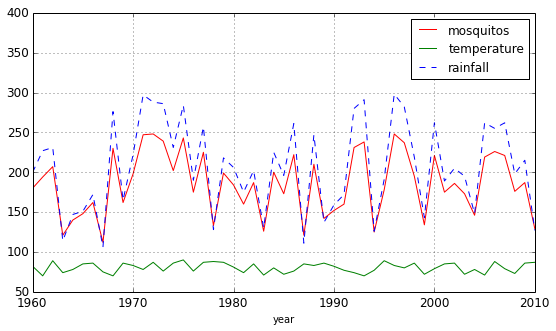

In [63]:
Mdata.plot(x='year', y=['mosquitos','temperature','rainfall'], 
           kind='line', ylim=(50,400), figsize=(9,5), 
           fontsize=12, style=['r-', 'g-', 'b--'])

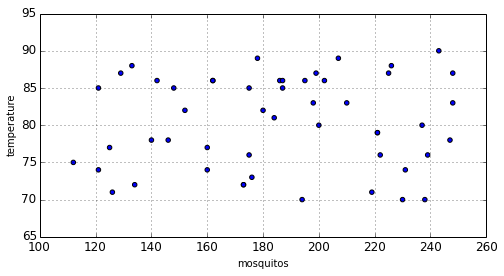

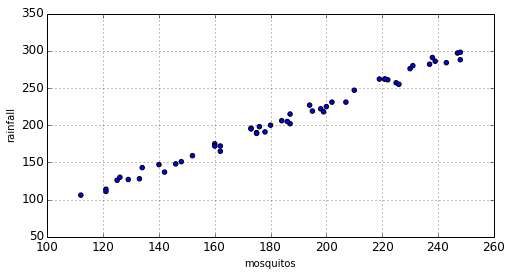

In [53]:
Mdata.plot(x='mosquitos', y='temperature', kind='scatter', 
           legend=False, figsize=(8,4), fontsize=12)
Mdata.plot(x='mosquitos', y='rainfall', kind='scatter', 
           legend=False, figsize=(8,4), fontsize=12)

There is no obvious sasonal effect on the number of mosquitoes with respect to year, and there seems to be no obvious pattern with temperature as well. However, rainfall vs mosquitoes show an amazing linear relationship!!

**Tip:** pandas offer a lot of easy-to-use plot options, make sure to check it [here](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.plot.html)!!

<br />

The most natural next step would be to fit a linear function.

In [82]:
print '---\nFitting a*x + b...'

slope, intercept, r, p, stderr = stats.linregress(
        Mdata_MvsR['rainfall'], Mdata_MvsR['mosquitos'])

print 'Fit done.\n---\n'

print 'Adjusted parameters:'
print 'a: ', slope
print 'b: ', intercept

print '\nGoodness of fitting (R-squared): ', r**2

---
Fitting a*x + b...
Fit done.
---

Adjusted parameters:
a:  0.695884966872
b:  41.1598163687

Goodness of fitting (R-squared):  0.991315935461


Let's now plot our fitted curve and the data together.

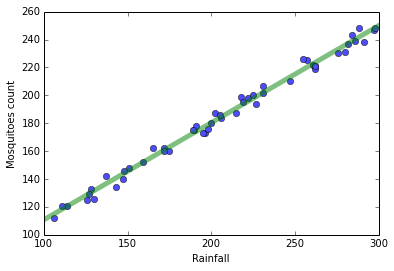

In [106]:
pl.figure( figsize=(6,4) )

pl.plot(Mdata_MvsR['rainfall'], Mdata_MvsR['mosquitos'], 
        'o', color=(.3,.3,1.)) # using RGB for color

X = np.arange(100,300,0.1)
Y = slope*X + intercept
pl.plot(X, Y, 'g-', linewidth=5., alpha=0.5) ## alpha option makes 
                                              ## the line somewhat transparent

pl.xlabel('Rainfall')
pl.ylabel('Mosquitoes count')

pl.show()